## **SKIN CANCER PROJECT**




# **!!! Warning here in this file, we trained the model for 3 epochs for demonstration, but in fact the model was trained for 30 epochs**

This project, undertaken by Erniyaz Ashuov, Tolegen Aiteni, and Ilkham Asimov, applies deep learning to detect and classify skin cancer from images. Utilizing cutting-edge neural networks for image analysis, the team's AI model aims to offer rapid and accurate skin lesion assessments. The result is an accessible web-based diagnostic tool that exemplifies the intersection of technology and healthcare for early cancer detection.

Datasets:

1. **ISIC_2019_Training_Input** - training dataset

2. **ISIC_2019_Test_Input** - test dataset, but we didn't use it because testdataset metadata has no diagnoses. Of course, unsupervised learning could be used, but we wanted classification. Because of this, we have divided training into a train set and validation set by 80/20

3. **ISIC_2019_Training_GroundTruth.csv** - metadata where all diagnoses and id image are located: image, MEL, NV, BCC, AK, BKL, DF, VASC, SCC, UNK.


4. **ISIC_2019_Training_Metadata.csv** - used for skin lesion analysis: image, age_approx, anatom_site_general, lesion_id, sex

Diagnosis(8 classes and UNK(Unknown)):
1) MEL (Melanoma): Malignant

2) NV (Nevus): Benign

3) BCC (Basal Cell Carcinoma): Malignant

4) AK (Actinic Keratosis): Precancerous

5) BKL (Benign Keratosis-Like Lesions): Benign

6) DF (Dermatofibroma): Benign

7) VASC (Vascular Lesions): Benign

8) SCC (Squamous Cell Carcinoma): Malignant

9) UNK (Unknown): Unclassified


Benign refers to a condition, tumor, or growth that is not cancerous. It doesn't spread to other parts of the body and is generally less serious than malignant conditions.


Malignant refers to cancerous growths or tumors. These can spread to other parts of the body, invade nearby tissues, and are potentially life-threatening if not treated effectively.

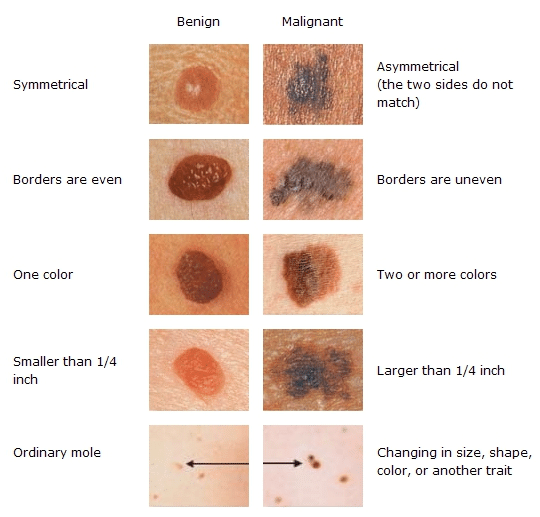

# Importing ISIC 2019 dataset and metadata

In [1]:
!wget https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_Input.zip

--2024-03-06 16:14:02--  https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_Input.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 3.5.25.182, 54.231.162.1, 3.5.29.96, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|3.5.25.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9771618190 (9.1G) [application/zip]
Saving to: ‘ISIC_2019_Training_Input.zip’

ISIC_2019_Training_ 100%[===================>]   9.10G  64.3MB/s    in 2m 33s  

2024-03-06 16:16:36 (60.7 MB/s) - ‘ISIC_2019_Training_Input.zip’ saved [9771618190/9771618190]



In [2]:
!wget https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Test_Input.zip

--2024-03-06 16:17:03--  https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Test_Input.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 52.216.32.9, 52.216.78.68, 52.217.205.217, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|52.216.32.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3823247963 (3.6G) [application/zip]
Saving to: ‘ISIC_2019_Test_Input.zip’

ISIC_2019_Test_Inpu 100%[===================>]   3.56G  70.0MB/s    in 57s     

2024-03-06 16:18:01 (63.9 MB/s) - ‘ISIC_2019_Test_Input.zip’ saved [3823247963/3823247963]



In [3]:
!unzip ISIC_2019_Training_Input.zip -d ./

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: ./ISIC_2019_Training_Input/ISIC_0065357.jpg  
  inflating: ./ISIC_2019_Training_Input/ISIC_0065358.jpg  
  inflating: ./ISIC_2019_Training_Input/ISIC_0065359.jpg  
  inflating: ./ISIC_2019_Training_Input/ISIC_0065360.jpg  
  inflating: ./ISIC_2019_Training_Input/ISIC_0065361.jpg  
  inflating: ./ISIC_2019_Training_Input/ISIC_0065362.jpg  
  inflating: ./ISIC_2019_Training_Input/ISIC_0065366.jpg  
  inflating: ./ISIC_2019_Training_Input/ISIC_0065367.jpg  
  inflating: ./ISIC_2019_Training_Input/ISIC_0065368.jpg  
  inflating: ./ISIC_2019_Training_Input/ISIC_0065370.jpg  
  inflating: ./ISIC_2019_Training_Input/ISIC_0065371.jpg  
  inflating: ./ISIC_2019_Training_Input/ISIC_0065372.jpg  
  inflating: ./ISIC_2019_Training_Input/ISIC_0065374.jpg  
  inflating: ./ISIC_2019_Training_Input/ISIC_0065376.jpg  
  inflating: ./ISIC_2019_Training_Input/ISIC_0065377.jpg  
  inflating: ./ISIC_2019_Training_Input/ISIC_00

In [4]:
!unzip ISIC_2019_Test_Input.zip -d ./

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: ./ISIC_2019_Test_Input/ISIC_0057952.jpg  
  inflating: ./ISIC_2019_Test_Input/ISIC_0057954.jpg  
  inflating: ./ISIC_2019_Test_Input/ISIC_0057955.jpg  
  inflating: ./ISIC_2019_Test_Input/ISIC_0057956.jpg  
  inflating: ./ISIC_2019_Test_Input/ISIC_0057957.jpg  
  inflating: ./ISIC_2019_Test_Input/ISIC_0057961.jpg  
  inflating: ./ISIC_2019_Test_Input/ISIC_0057965.jpg  
  inflating: ./ISIC_2019_Test_Input/ISIC_0057967.jpg  
  inflating: ./ISIC_2019_Test_Input/ISIC_0057968.jpg  
  inflating: ./ISIC_2019_Test_Input/ISIC_0057971.jpg  
  inflating: ./ISIC_2019_Test_Input/ISIC_0057972.jpg  
  inflating: ./ISIC_2019_Test_Input/ISIC_0057976.jpg  
  inflating: ./ISIC_2019_Test_Input/ISIC_0057981.jpg  
  inflating: ./ISIC_2019_Test_Input/ISIC_0057982.jpg  
  inflating: ./ISIC_2019_Test_Input/ISIC_0057983.jpg  
  inflating: ./ISIC_2019_Test_Input/ISIC_0057991.jpg  
  inflating: ./ISIC_2019_Test_Input/ISIC_0057992.jpg

In [5]:
!wget https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_GroundTruth.csv

--2024-03-06 16:26:15--  https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_GroundTruth.csv
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 3.5.20.19, 3.5.25.18, 52.216.63.33, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|3.5.20.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1291479 (1.2M) [text/csv]
Saving to: ‘ISIC_2019_Training_GroundTruth.csv’

ISIC_2019_Training_ 100%[===================>]   1.23M  3.03MB/s    in 0.4s    

2024-03-06 16:26:16 (3.03 MB/s) - ‘ISIC_2019_Training_GroundTruth.csv’ saved [1291479/1291479]



In [6]:
!wget https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_Metadata.csv

--2024-03-06 16:26:25--  https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_Metadata.csv
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 52.217.235.105, 52.216.50.1, 16.182.40.33, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|52.217.235.105|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1214351 (1.2M) [text/csv]
Saving to: ‘ISIC_2019_Training_Metadata.csv’

ISIC_2019_Training_ 100%[===================>]   1.16M  --.-KB/s    in 0.1s    

2024-03-06 16:26:25 (8.07 MB/s) - ‘ISIC_2019_Training_Metadata.csv’ saved [1214351/1214351]





---



# **STEP** **1 Understand and visualize the dataset, including the images and their metadata**

Image Count in Training and Test Directories







In [9]:
import os

training_input_path1 = '/content/ISIC_2019_Training_Input'
test_input_path1 = '/content/ISIC_2019_Test_Input'

training_image_count1 = len([name for name in os.listdir(training_input_path1) if os.path.isfile(os.path.join(training_input_path1, name))])
test_image_count1 = len([name for name in os.listdir(test_input_path1) if os.path.isfile(os.path.join(test_input_path1, name))])

print(f'Number of images in training input: {training_image_count1}')
print(f'Number of images in test input: {test_image_count1}')


Number of images in training input: 25333
Number of images in test input: 8240


Data Loading and Preview

In [11]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.preprocessing import image

training_input_path = '/content/ISIC_2019_Training_Input'
training_metadata_path = '/content/ISIC_2019_Training_Metadata.csv'
training_ground_truth_path = '/content/ISIC_2019_Training_GroundTruth.csv'

training_metadata = pd.read_csv(training_metadata_path)
training_ground_truth = pd.read_csv(training_ground_truth_path)

print(training_metadata.head())
print(training_ground_truth.head())

          image  age_approx anatom_site_general lesion_id     sex
0  ISIC_0000000        55.0      anterior torso       NaN  female
1  ISIC_0000001        30.0      anterior torso       NaN  female
2  ISIC_0000002        60.0     upper extremity       NaN  female
3  ISIC_0000003        30.0     upper extremity       NaN    male
4  ISIC_0000004        80.0     posterior torso       NaN    male
          image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK
0  ISIC_0000000  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
1  ISIC_0000001  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
2  ISIC_0000002  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
3  ISIC_0000003  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
4  ISIC_0000004  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0


Skin Lesion Images Visualization with Metadata

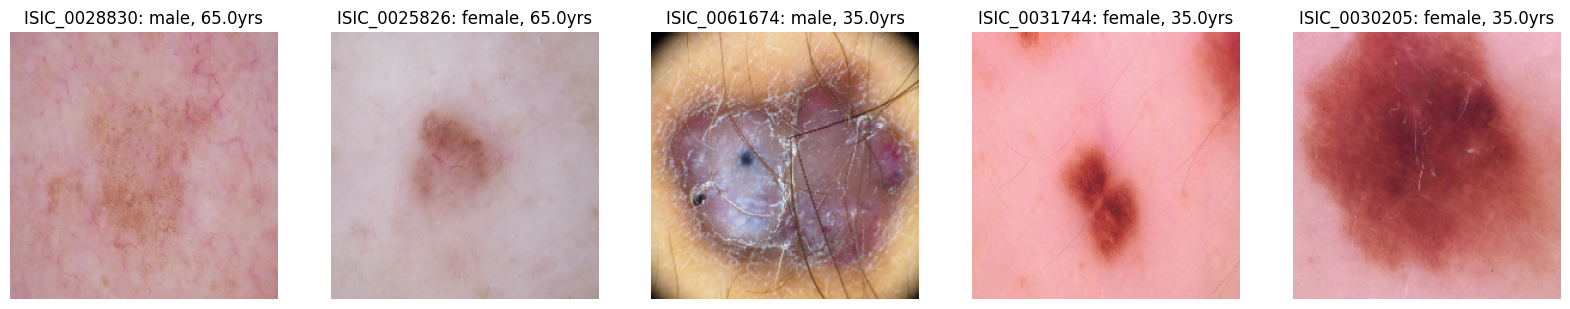

In [17]:
def visualize_images(images_folder, metadata_df, num_images=5):
    sample_images = random.sample(os.listdir(images_folder), num_images)
    plt.figure(figsize=(20, 10))
    for i, image_name in enumerate(sample_images):
        img_path = os.path.join(images_folder, image_name)
        img = image.load_img(img_path, target_size=(224, 224))
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis('off')

        base_name = os.path.splitext(image_name)[0]

        img_metadata = metadata_df[metadata_df['image'] == base_name]
        if not img_metadata.empty:
            plt.title(f"{base_name}: {img_metadata.iloc[0]['sex']}, {img_metadata.iloc[0]['age_approx']}yrs")
        else:
            plt.title(f"{base_name}: Metadata not found")

    plt.show()

visualize_images(training_input_path, training_metadata)

Statistical distributions of age, anatomical site, and sex from the training metadata

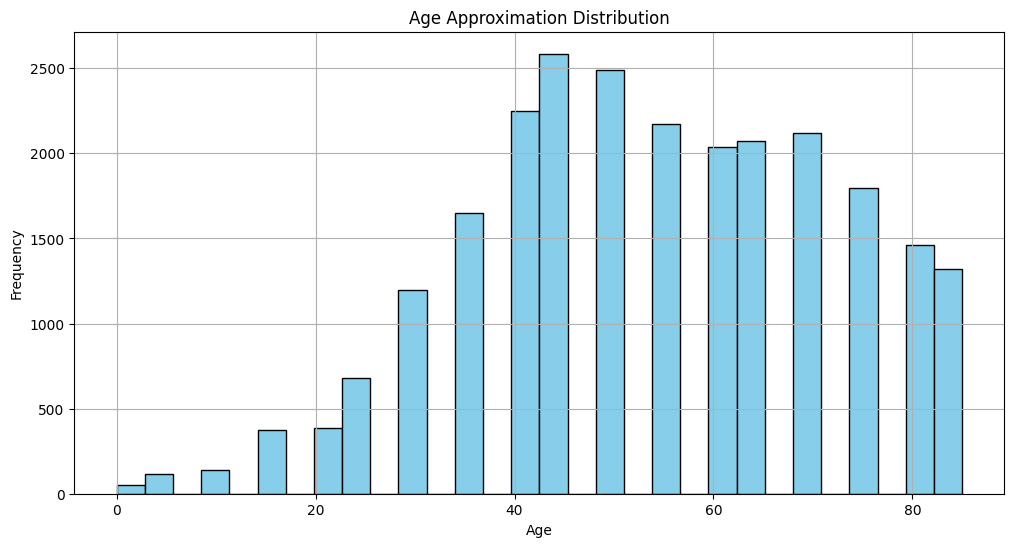

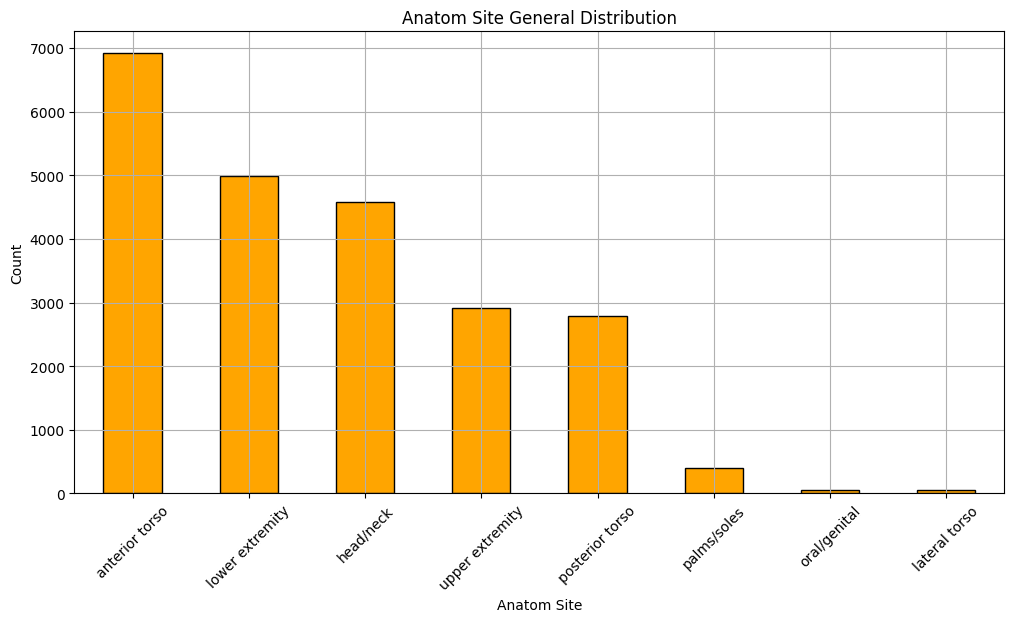

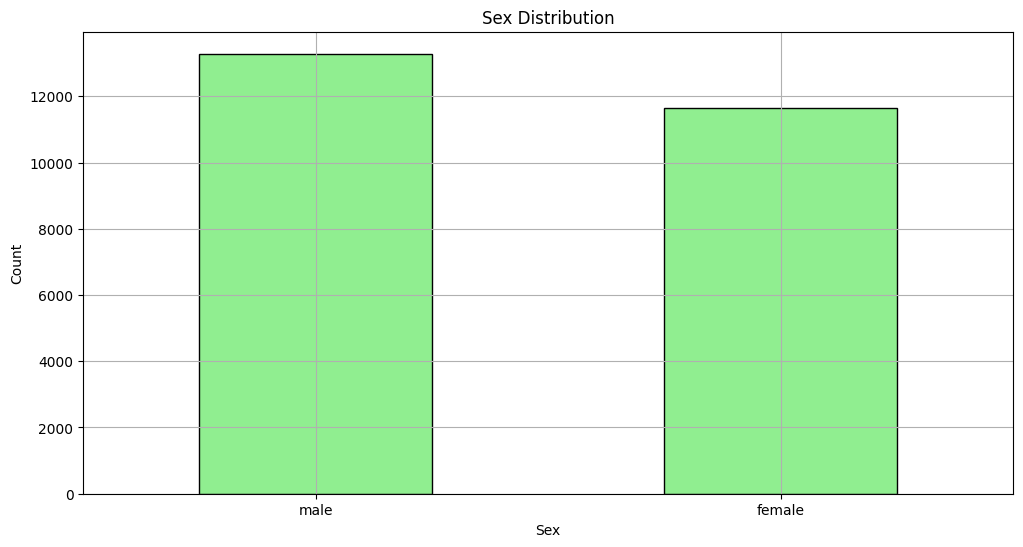

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(training_metadata['age_approx'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Age Approximation Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
training_metadata['anatom_site_general'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Anatom Site General Distribution')
plt.xlabel('Anatom Site')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
training_metadata['sex'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

<ipython-input-25-ed8875baec18>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sex_diagnosis_counts = merged_data.drop(columns=['age_approx', 'anatom_site_general', 'lesion_id']).groupby('sex').sum()


<Figure size 1000x500 with 0 Axes>

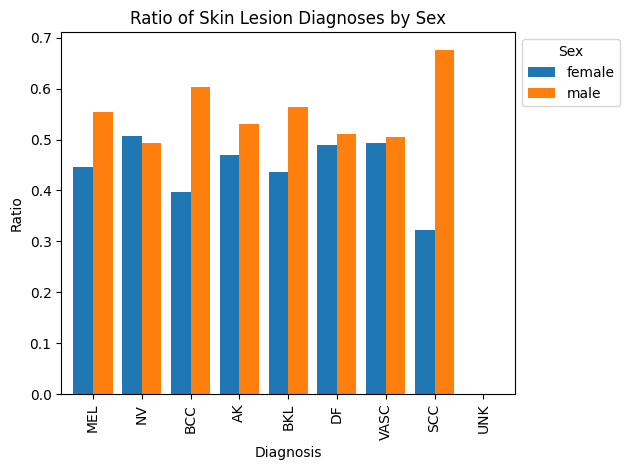

In [25]:
merged_data = pd.merge(training_metadata, training_ground_truth, on='image')
sex_diagnosis_counts = merged_data.drop(columns=['age_approx', 'anatom_site_general', 'lesion_id']).groupby('sex').sum()
diagnosis_ratios_by_sex = sex_diagnosis_counts.div(sex_diagnosis_counts.sum(axis=0), axis=1)

plt.figure(figsize=(10, 5))
diagnosis_ratios_by_sex.T.plot(kind='bar', width=0.8)
plt.title('Ratio of Skin Lesion Diagnoses by Sex')
plt.ylabel('Ratio')
plt.xlabel('Diagnosis')
plt.legend(title='Sex', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

Patients' ages within each diagnosis category.


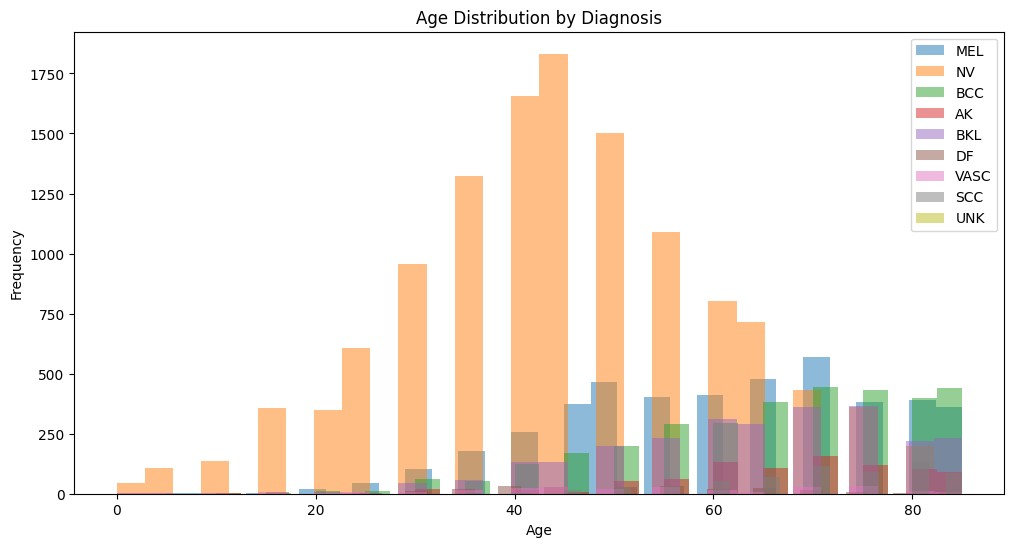

In [26]:
plt.figure(figsize=(12, 6))
for diagnosis in training_ground_truth.columns[1:]:
    subset = training_metadata[training_metadata['image'].isin(training_ground_truth[training_ground_truth[diagnosis] == 1]['image'])]
    plt.hist(subset['age_approx'].dropna(), bins=30, alpha=0.5, label=diagnosis)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Diagnosis')
plt.legend()
plt.show()


Frequency of lesions on different parts of the body


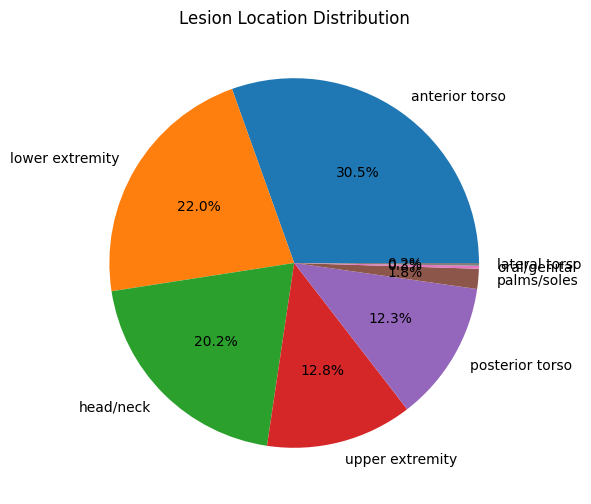

In [27]:
plt.figure(figsize=(12, 6))
training_metadata['anatom_site_general'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Lesion Location Distribution')
plt.ylabel('')
plt.show()



---



# **STEP** **2: Data Preprocessing and Preparation**




Load and merge the metadata and ground truth


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

metadata_path = '/content/ISIC_2019_Training_Metadata.csv'
ground_truth_path = '/content/ISIC_2019_Training_GroundTruth.csv'
metadata = pd.read_csv(metadata_path)
ground_truth = pd.read_csv(ground_truth_path)
full_data = pd.merge(metadata, ground_truth, on='image')

Appending Image Extensions and Filtering 'UNK' Rows

In [34]:
full_data['image'] = full_data['image'].apply(lambda x: x + '.jpg' if not x.endswith('.jpg') else x)

full_data = full_data[full_data['UNK'] != 1]

label_columns = ground_truth.columns[1:-1]  # Excluding 'UNK'

Label Conversion, Data Split, Image Generators

In [36]:
def convert_one_hot_to_categorical(dataframe, label_columns):
    dataframe['labels'] = dataframe[label_columns].idxmax(axis=1)
    return dataframe

train_data, validation_data = train_test_split(full_data, test_size=0.2, random_state=42)
train_data = convert_one_hot_to_categorical(train_data, label_columns)
validation_data = convert_one_hot_to_categorical(validation_data, label_columns)

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

Image Data Generation from DataFrame for Neural Network Training



In [37]:
training_images_dir = '/content/ISIC_2019_Training_Input'

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=training_images_dir,
    x_col='image',
    y_col='labels',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=validation_data,
    directory=training_images_dir,
    x_col='image',
    y_col='labels',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 20264 validated image filenames belonging to 8 classes.
Found 5067 validated image filenames belonging to 8 classes.


Data Saving and Diagnosis Extraction

In [38]:
train_data.to_csv('/content/train_data.csv', index=False)
validation_data.to_csv('/content/validation_data.csv', index=False)

diagnoses = ground_truth.columns[1:]
print("Diagnoses/Categories in the Dataset:", diagnoses.tolist())

Diagnoses/Categories in the Dataset: ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']




---



# **Step 3: Model Development**

We used EfficientNetB4 to train the model and information about this model:

Main Model Architecture: Our model architecture is based on EfficientNetB4, a convolutional neural network renowned for its efficiency and effectiveness in image classification tasks. EfficientNetB4 is initialized with weights from the imagenet dataset, providing a strong foundation for learning hierarchical features.

Additional Layers: We include a global average pooling layer to condense the spatial dimensions of the extracted features, followed by a dense layer with a sigmoid activation function, generating a single output representing the probability of the input image being fake.

Model Compilation: The model is compiled using the stochastic gradient descent (SGD) optimizer, with a learning rate of 0.01 and momentum of 0.9, striking a balance between rapid convergence and stability.

During training, our model exhibited promising performance, achieving impressive accuracy on the training set. This underscores its effectiveness in learning intricate patterns and features indicative of fake images. Leveraging transfer learning with pre-trained EfficientNetB4 on ImageNet provided a robust foundation for feature extraction.

Moving forward, we aim to focus on extensive validation and testing to ensure the model's robustness and reliability in diverse scenarios. This work lays the groundwork for contributing to the field of image forensics and fake image detection

🔗 Source: https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet


In [45]:
import sys
import time
from collections import defaultdict
import cv2
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

Pre-trained EfficientNetB4 Model Initialization

In [41]:
base_model = EfficientNetB4(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

71686520/71686520 [==============================] - 1s 0us/step


Transfer Learning Model Construction

In [46]:
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

Model Compilation and Summary Display

In [47]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0][0]']   

Training with Early Stopping and Model Checkpointing

This code segment demonstrates the training process of a neural network model using early stopping and model checkpointing techniques:

In [48]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')
epochs = 3
model_checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/3
  8/633 [..............................] - ETA: 1:38:40 - loss: 1.6745 - accuracy: 0.4180

KeyboardInterrupt: 

Accuracy of training

In [ ]:
scores = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Accuracy: {scores[1]*100}%")

158/158 [==============================] - 60s 380ms/step - loss: 1.0263 - accuracy: 0.6365
Accuracy: 63.64715099334717%


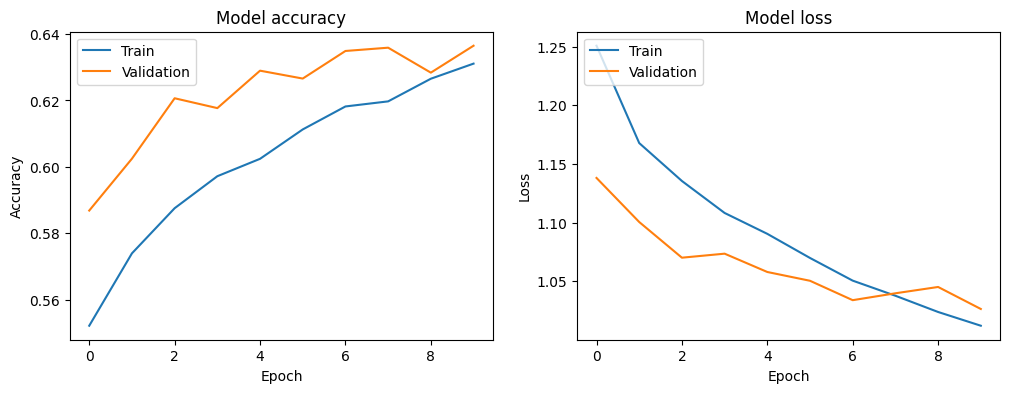

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()



---



Model Fine-tuning with Optimized Parameters

In [ ]:
model = load_model('best_model.h5')

optimizer = Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
model_checkpoint = ModelCheckpoint('best_model_finetuned.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6, mode='min', verbose=1)

history_finetune = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=3,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)


Epoch 1/10
633/633 [==============================] - ETA: 0s - loss: 0.9543 - accuracy: 0.6487
Epoch 1: val_loss improved from inf to 0.99429, saving model to best_model_finetuned.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


633/633 [==============================] - 405s 613ms/step - loss: 0.9543 - accuracy: 0.6487 - val_loss: 0.9943 - val_accuracy: 0.6501 - lr: 1.0000e-04
Epoch 2/10
633/633 [==============================] - ETA: 0s - loss: 0.9325 - accuracy: 0.6565
Epoch 2: val_loss improved from 0.99429 to 0.99356, saving model to best_model_finetuned.h5
633/633 [==============================] - 392s 619ms/step - loss: 0.9325 - accuracy: 0.6565 - val_loss: 0.9936 - val_accuracy: 0.6507 - lr: 1.0000e-04
Epoch 3/10
633/633 [==============================] - ETA: 0s - loss: 0.9225 - accuracy: 0.6614
Epoch 3: val_loss improved from 0.99356 to 0.99019, saving model to best_model_finetuned.h5
633/633 [==============================] - 375s 593ms/step - loss: 0.9225 - accuracy: 0.6614 - val_loss: 0.9902 - val_accuracy: 0.6529 - lr: 1.0000e-04
Epoch 4/10
633/633 [==============================] - ETA: 0s - loss: 0.9076 - accuracy: 0.6637
Epoch 4: val_loss improved from 0.99019 to 0.98877, saving model to best

Accuracy of Fine-tuning

In [ ]:
scores2 = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Accuracy: {scores2[1]*100}%")

158/158 [==============================] - 62s 391ms/step - loss: 0.9782 - accuracy: 0.6582
Accuracy: 65.82278609275818%


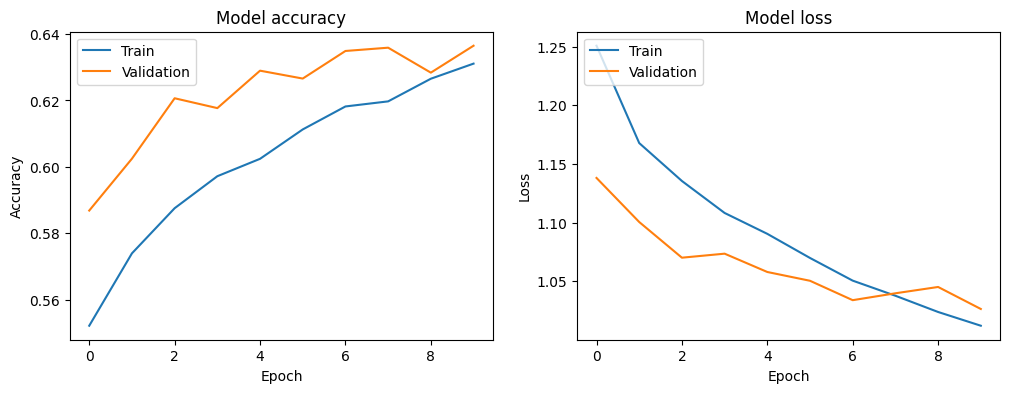

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

Save model

In [ ]:
model.save('/content/best_model_finetuned.h5')



---



# **STEP 4 Web Development**

**WEB**



```
import os
import pandas as pd
from flask import Flask, request, render_template, jsonify
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image
from io import BytesIO
import numpy as np
import base64

app = Flask(__name__, template_folder='.')

# Load the trained model
model = load_model('best_model_finetuned.h5')

# Diagnosis dictionary mapping for predictions
diagnosis_dict = {
    0: 'MEL',
    1: 'NV',
    2: 'BCC',
    3: 'AK',
    4: 'BKL',
    5: 'DF',
    6: 'VASC',
    7: 'SCC',
    8: 'UNK'
}

# Load actual diagnoses data
def load_actual_diagnoses():
    return pd.read_csv('ISIC_2019_Training_GroundTruth.csv')

@app.route('/', methods=['GET'])
def index():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if 'image' not in request.files:
        return "No file part"

    file = request.files['image']
    if file.filename == '':
        return "No selected file"

    if file and allowed_file(file.filename):
        try:
            img_bytes = BytesIO(file.read())
            img_bytes_for_display = img_bytes.getvalue()  # Preserve the original image bytes for display
            filename = os.path.splitext(file.filename)[0]  # Extract filename without extension

            img = Image.open(img_bytes)
            img = img.resize((224, 224))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array /= 255.0

            predictions = model.predict(img_array)
            predicted_class = np.argmax(predictions, axis=1)
            predicted_diagnosis = diagnosis_dict[predicted_class[0]]
            confidence = np.max(predictions) * 100  # Get the highest confidence value

            actual_diagnoses_df = load_actual_diagnoses()
            actual_diagnosis_row = actual_diagnoses_df[actual_diagnoses_df['image'] == filename]
            actual_diagnosis = 'Not available'
            if not actual_diagnosis_row.empty:
                actual_diagnosis = actual_diagnosis_row.iloc[0][1:].idxmax()  # Get the label with the highest value

            # Convert image for HTML display
            encoded_img = base64.b64encode(img_bytes_for_display).decode('utf-8')
            image_data = f"data:image/jpeg;base64,{encoded_img}"

            return render_template('prediction.html', predicted_diagnosis=predicted_diagnosis, actual_diagnosis=actual_diagnosis, confidence=confidence, image_data=image_data, filename=filename)
        except Exception as e:
            return f"An error occurred: {e}"

    return "Invalid request"

def allowed_file(filename):
    return '.' in filename and filename.rsplit('.', 1)[1].lower() in ['png', 'jpg', 'jpeg']

if __name__ == '__main__':
    app.run(debug=True)

```

